#Twitter Sentiment Analysis

In [1]:
#Importing pandas and numpy libraries for data processing.
import numpy as np 
import pandas as pd 

In [ ]:
# Filtering and storing only necessary columns
data = pd.read_csv('Sentiment.csv')
data = data[['text','sentiment']]

In [ ]:
#Importing test_train split module from sklearn
from sklearn.model_selection import train_test_split 

In [ ]:
# Splitting dataset into train and test dataset
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments from datasets
data_prep = train[train.sentiment != "Neutral"]

In [ ]:
#Separating the positive and negative data from dataset
train_positive = data_prep[ data_prep['sentiment'] == 'Positive']
train_positive = train_positive['text']
train_negative = data_prep[ data_prep['sentiment'] == 'Negative']
train_negative = train_negative['text']

In [ ]:
#Importing wordcloud and matplotlib
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
#Defining a function to plot the datas in wordcloud
def wc_draw(datas, color = 'black'):
    words = ' '.join(datas)
    cleaned_word = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT'])
    words = WordCloud(stopwords=STOPWORDS,background_color=color,width=2500,height=2000).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(words)
    plt.axis('off')
    plt.show()

 ==== Positive words ====


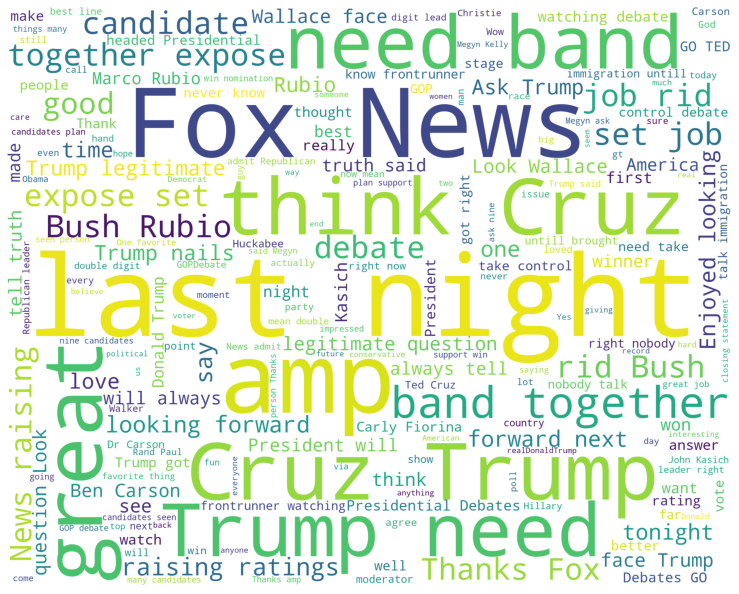

In [ ]:
#printing the positive words using wordcloud
print(" ==== Positive words ====")
wc_draw(train_positive,'white')

====  Negative words  ====


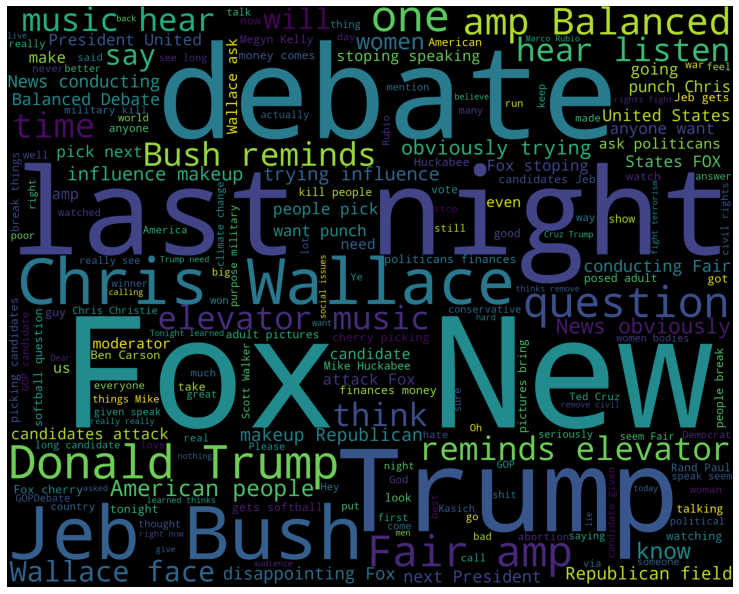

In [ ]:
#plotting the negative words using wordcloud
print("====  Negative words  ====")
wc_draw(train_negative)

In [2]:
#Importing NLTK library
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#cleaning and preProcessing the data
tweets = []
stopwords = set(stopwords.words("english"))
for index, row in train.iterrows():
    filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    cleaned = [word for word in filtered if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT']
    words_without_stopwords = [word for word in cleaned if not word in stopwords]
    tweets.append((words_without_stopwords, row.sentiment))

In [ ]:
#Diving the positive and negative datas from dataset
test_positive = test[ test['sentiment'] == 'Positive']
test_positive = test_positive['text']
test_negative = test[ test['sentiment'] == 'Negative']
test_negative = test_negative['text']

In [ ]:
#Defining a function to extract words
def take_words_from_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

In [ ]:
#Defining a function to get word features
def word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features


In [ ]:
words_feature = word_features(take_words_from_tweets(tweets))
words_feature

dict_keys(['morning', 'gov:', 'most-retweeted', 'media', 'tweet', 'candidate', 'received', 'word', 'god?!', 'presidential', 'hopefuls?!', 'america?!', 'christian', 'brotherhood', 'america', 'got', 'drunk', 'watching', 'last', 'night.', 'realize', 'talking', 'show,', 'look', 'polls', 'answer.', 'audience', 'sounds', 'like', 'mob', 'ready', 'ask', 'trump', 'legitimate', 'question.', "wallace's", 'face', 'nails', 'it.', 'bobby', 'jindal', 'said', '"immigration', 'without', 'assimilation', 'invasion."', 'god,', 'man', 'never', 'eaten', 'gulab', 'jamun.', 'cruz:', 'willing', 'call', 'radical', 'islamic', 'terrorism.', 'need', 'make', 'joining', 'isis', 'death', 'warrant.', 'boy:', '"social', 'issues"', 'gop', 'code', 'control', "women's", 'bodies', '&amp;', 'sexuality', 'most.', 'hold', 'tight,', 'twitterland', 'jeb', 'bush', 'reminds', 'elevator', 'music.', 'hear', 'listen.', 'one', 'clown', 'stage', 'idiots', 'night,', 'match', "pbo's", 'accomplishments', 'ok,', 'gave', 'lot', 'material',

In [ ]:
#Defining function to extract the features from the documents
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in words_feature:
        features['contains(%s)' % word] = (word in document_words)
    return features

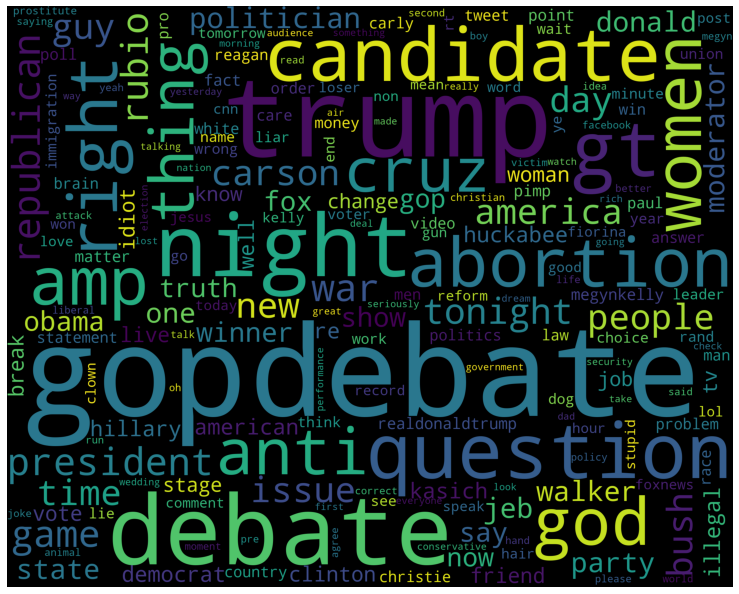

In [ ]:
wc_draw(words_feature)

In [ ]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:

positive_count = 0
negative_count = 0
for obj in test_positive: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        positive_count = positive_count + 1
for obj in test_negative: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        negative_count = negative_count + 1


print('[Positive]: %s/%s '  % (len(test_positive),positive_count))          
print('[Negative]: %s/%s '  % (len(test_negative),negative_count))        


[Positive]: 222/112 
[Negative]: 838/815 
